# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Load Csv

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Arbor pandas/Diwali Sales Data.csv", encoding="latin1")

In [10]:
df.head(2)                   # Take Overview of data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


# Dataset Rows & Columns count

In [11]:
df.shape

(11251, 15)

In [12]:
df.columns    # checking column names

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

# Dataset Info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Duplicate values

In [15]:
duplicate_values=df.duplicated().value_counts()
duplicate_values

,count
False,11243
True,8


In [18]:
df.drop_duplicates(inplace=True)    # drop duplicates

In [20]:
df.shape

(11243, 15)

In [21]:
df.reset_index(drop=True, inplace=True)    # reset index

# Handling Null Values

In [22]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [24]:
df.dropna(subset=["Amount"], inplace=True)   #droping null values from Amount
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [25]:
df.shape

(11231, 15)

In [26]:
df.reset_index(drop=True, inplace=True)    # removed null from amount col, so need to reset indexes

# Dropping unnecessary columns

In [30]:
df.drop(columns=['Status','unnamed1','Product_ID'],inplace=True)   # removed Unnecessary col

In [32]:
df.columns

Index(['User_ID', 'Cust_name', 'Gender', 'Age Group', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [33]:
df.shape

(11231, 12)

# Adding Columns

In [34]:
df['total_value'] = df['Orders'] * df['Amount']   # added total value column

In [39]:
df['age_type'] = df['Age'].apply(lambda x: 'Young' if x < 30 else 'Adult' if x < 50 else 'Senior')    #added age_type column

In [45]:
df.head()

,User_ID,Cust_name,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,total_value,age_type
0,1002903,Sanskriti,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,23952.0,Young
1,1000732,Kartik,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,71802.0,Adult
2,1001990,Bindu,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,71772.0,Adult
3,1001425,Sudevi,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,47824.0,Young
4,1000588,Joni,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,47754.0,Young


In [46]:
df['marital_label'] = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})     #added marital_label  column

In [48]:
df.drop(columns='Marital_Status', inplace=True)   # dropping Marital_Status col

In [53]:
df.shape

(11231, 14)

#Checking all columns data types

In [55]:
df.head(2)

,User_ID,Cust_name,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount,total_value,age_type,marital_label
0,1002903,Sanskriti,F,26-35,28,Maharashtra,Western,Healthcare,Auto,1,23952.0,23952.0,Young,Unmarried
1,1000732,Kartik,F,26-35,35,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,71802.0,Adult,Married


In [56]:
df.dtypes

,0
User_ID,int64
Cust_name,object
Gender,object
Age Group,object
Age,int64
State,object
Zone,object
Occupation,object
Product_Category,object
Orders,int64


# Data Visualization

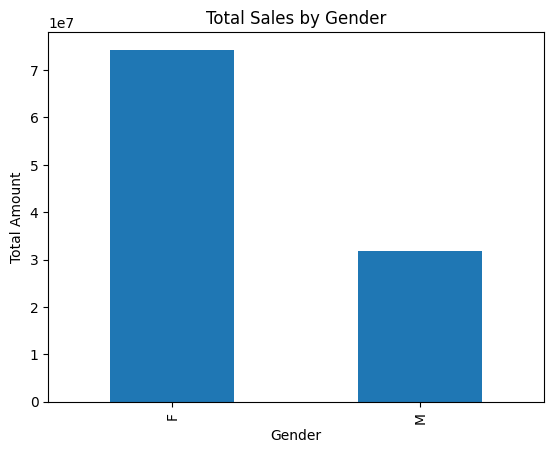

In [60]:
#1) Which Gender contributes more to total sales?
gender_sales = df.groupby('Gender')['Amount'].sum()

gender_sales.plot(kind='bar')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()



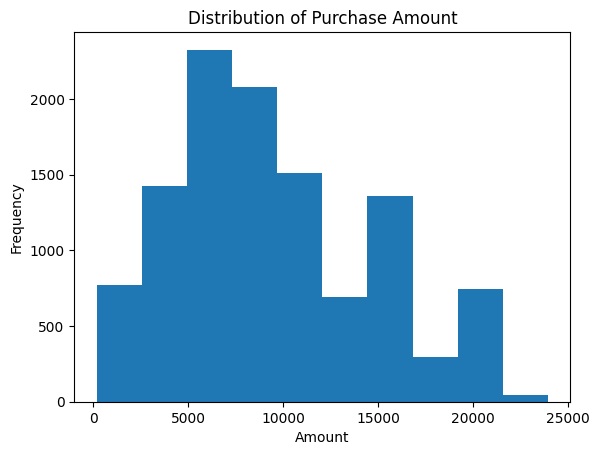

In [61]:
# 2) What is the distribution of purchase amount?

plt.hist(df['Amount'], bins=10)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


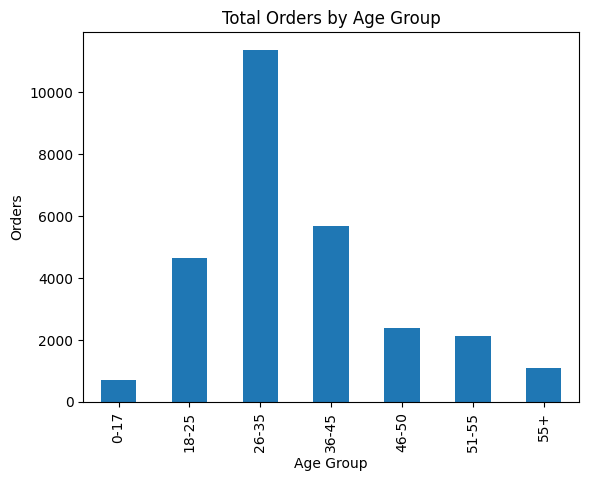

In [65]:
# 3) Which Age Group places more orders?
age_orders = df.groupby('Age Group')['Orders'].sum()

age_orders.plot(kind='bar')
plt.title('Total Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Orders')
plt.show()


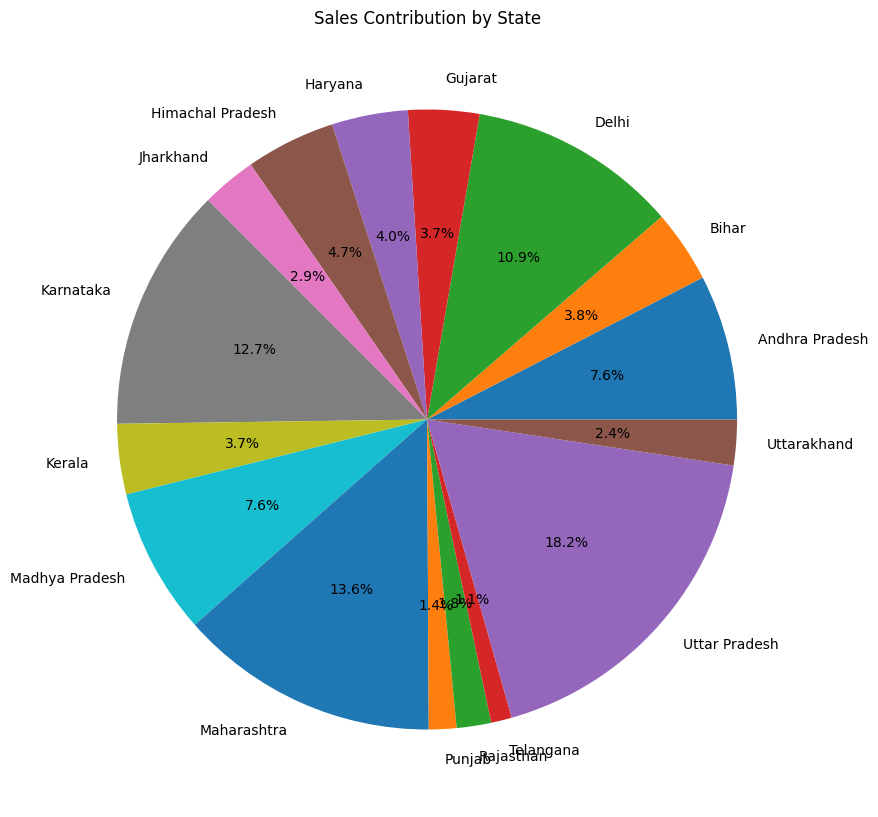

In [71]:
# 4)Percentage contribution of each State in sales
state_sales = df.groupby('State')['Amount'].sum()
plt.figure(figsize=(10,12))
plt.pie(state_sales, labels=state_sales.index, autopct='%1.1f%%')
plt.title('Sales Contribution by State')
plt.show()


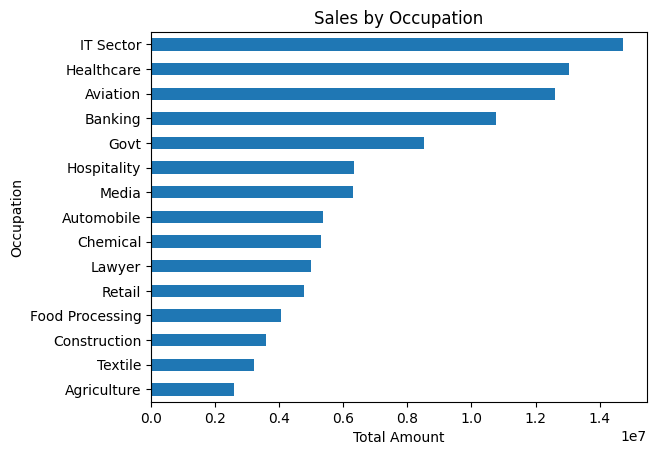

In [73]:
# 5)Which Occupation generates highest sales?
occ_sales = df.groupby('Occupation')['Amount'].sum().sort_values()

occ_sales.plot(kind='barh')
plt.title('Sales by Occupation')
plt.xlabel('Total Amount')
plt.ylabel('Occupation')
plt.show()


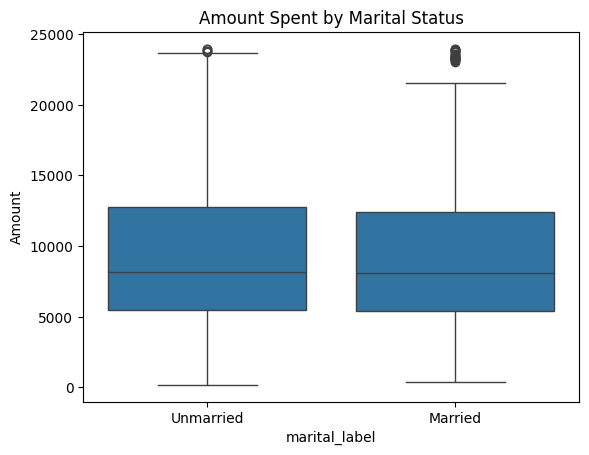

In [79]:
# 6)Does Marital Status affect spending?
sns.boxplot(x='marital_label', y='Amount', data=df)
plt.title('Amount Spent by Marital Status')
plt.show()

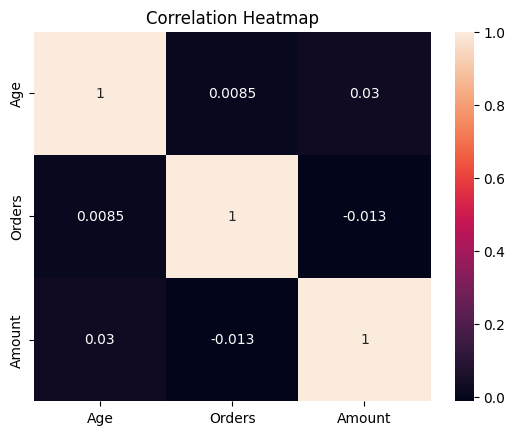

In [82]:
# 7)Heatmap: Correlation between numerical columns
corr = df[['Age', 'Orders', 'Amount']]

sns.heatmap(corr.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
